In [49]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


In [50]:
df = pd.read_csv('../stats_case_study/data/cars.csv')
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model  \
0  18.0          8         307.0      130.0  3504.0          12.0     70   
1  15.0          8         350.0      165.0  3693.0          11.5     70   
2  18.0          8         318.0      150.0  3436.0          11.0     70   
3  16.0          8         304.0      150.0  3433.0          12.0     70   
4  17.0          8         302.0      140.0  3449.0          10.5     70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


 398 entries, 9 columns. Car name and HP are object. Need to convert HP to int

In [52]:
print(df['horsepower'].unique())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


It looks like there is a question mark in there. That will need fixed

In [53]:
# Replace '?' with NaN
df['horsepower'].replace('?', np.nan, inplace=True)

# Convert the 'horsepower' column to float type
df['horsepower'] = df['horsepower'].astype(float)

# Fill the NaN values with the median of the column
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

# Check the data types again
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None


In [54]:
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.304020  2970.424623   
std      7.815984    1.701004    104.269838   38.222625   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   76.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration       model      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.0000

array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'model'}>,
        <Axes: title={'center': 'origin'}>, <Axes: >]], dtype=object)

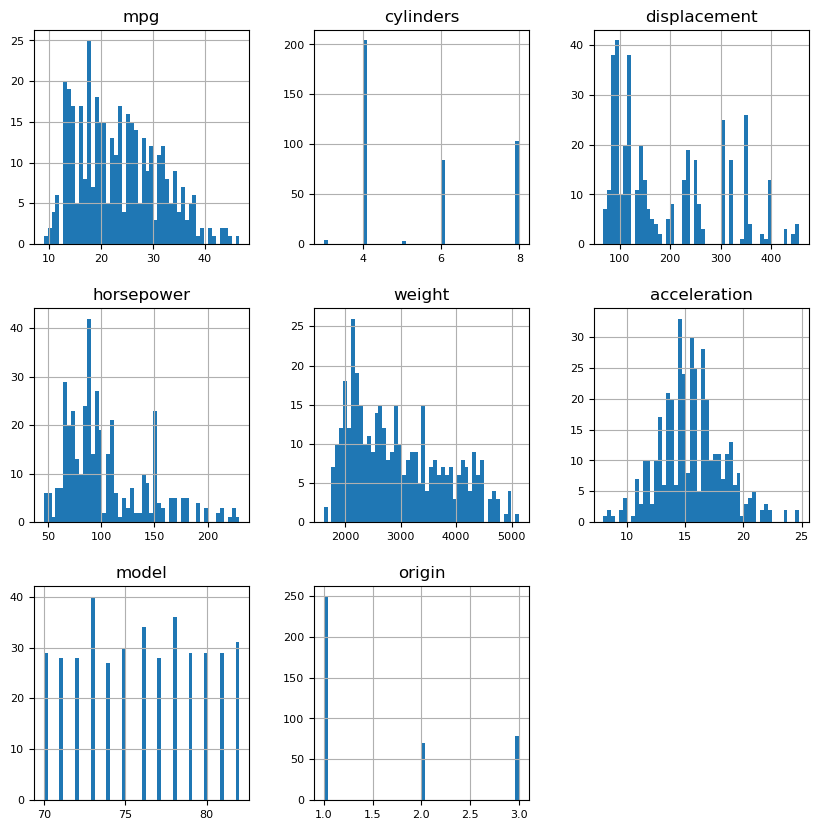

In [55]:
# Visualize the distributions of each feature
df.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)

C:\Users\austi\AppData\Local\Temp\ipykernel_23644\1987097705.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


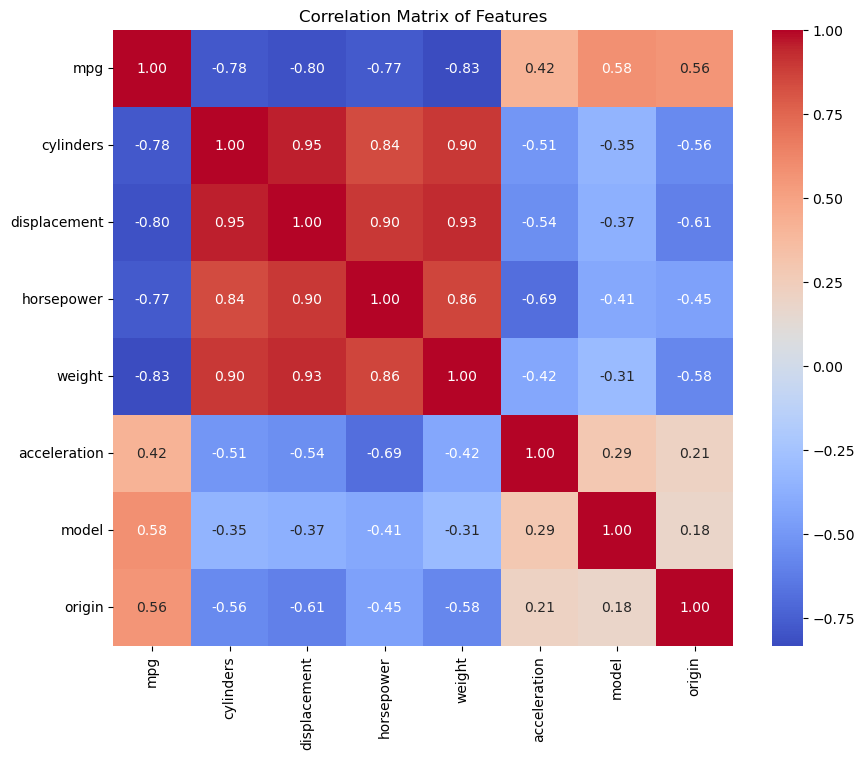

In [56]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [57]:
print(df['origin'].unique())

[1 3 2]


In [60]:
# Add a new column for region
df['region'] = df['origin'].map({1: 'USA', 2: 'Europe', 3: 'Asia'})
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  model  \
0  18.0          8         307.0       130.0  3504.0          12.0     70   
1  15.0          8         350.0       165.0  3693.0          11.5     70   
2  18.0          8         318.0       150.0  3436.0          11.0     70   
3  16.0          8         304.0       150.0  3433.0          12.0     70   
4  17.0          8         302.0       140.0  3449.0          10.5     70   

   origin                   car_name region  
0       1  chevrolet chevelle malibu    USA  
1       1          buick skylark 320    USA  
2       1         plymouth satellite    USA  
3       1              amc rebel sst    USA  
4       1                ford torino    USA  


$H_0$: The country of origin has no relationship with fuel efficiency
<br>
     $$
\mu_{\text{USA}} = \mu_{\text{Europe}} = \mu_{\text{Asia}}
$$
    
$H_a$: The country of origin has an affect on fuel efficiency
<br>
$$
\mu_{\text{USA}} \neq \mu_{\text{Europe}} \neq \mu_{\text{Asia}}
$$


In [ ]:
""" We know that because there are more than two indipendent varibles we will need to conduct an ANOVA test for variation.


What do we know?
Origin(non-descript) and mpg have a corr value of +0.56
There are three separate origin values. For our model 1:USA 2:Europe 3: Asia (because damn the man)
Dependent var = mpg
We need to conduct Cohen's D test because there is more than one equal sign in our munull




"""

In [67]:
n = len(df) # We will also need n for each region later

alpha = 0.05

sigma = np.std(df, ddof=1) # This will need to be calculated for each region as well

se = sigma / np.sqrt(n) # Same as above

C:\Users\austi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


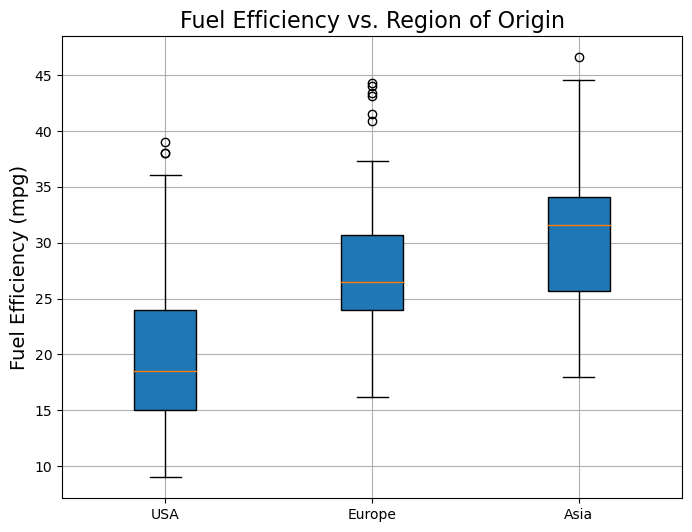

In [68]:
mpg_usa = df[df['origin'] == 1]['mpg'].tolist()
mpg_europe = df[df['origin'] == 2]['mpg'].tolist()
mpg_asia = df[df['origin'] == 3]['mpg'].tolist()

data = [mpg_usa, mpg_europe, mpg_asia]
labels = ['USA', 'Europe', 'Asia']

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels, patch_artist=True)
plt.title('Fuel Efficiency vs. Region of Origin', fontsize=16)
# plt.xlabel('Region of Origin', fontsize=14)
plt.ylabel('Fuel Efficiency (mpg)', fontsize=14)
plt.grid(True)
plt.show()

In [69]:
f_stat, p_value = f_oneway(df[df['region'] == 'USA']['mpg'],
                   df[df['region'] == 'Europe']['mpg'],
                   df[df['region'] == 'Asia']['mpg'])

print(f'The f-statistic is {f_stat} and the p-value is {p_value}')

The f-statistic is 98.54179491075871 and the p-value is 1.9154864184128e-35


In order to mathematically define Mu(null) and Mu(alt) we need to conduct Cohen's D test. Cohen's d test establishes the standardized effect size for measuring the difference between two (or more) groups. It is computed by calculating the difference of two means divided by the pooled standard deviations. 

What do we need for Cohen's d test?
mean of each group
sample size of each group
each group's standard deviation
the pooled standard deviation between combinations.

Probably easier to just create a function ("There is no function you need that someone else hasn't already created" -THEY said

In [70]:
# Function to calculate Cohen's d for independent samples such that d=(mu1 - mu2)/std(pooled)
def cohens_d(group1, group2):
    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    d = diff / np.sqrt(pooled_var)
    return d

In [72]:
# Find Cohen's d for mpg between regions
# Define regions and associate them to mpg
usa = df[df['region'] == 'USA']['mpg']
europe = df[df['region'] == 'Europe']['mpg']
asia = df[df['region'] == 'Asia']['mpg']

# Use function to calculate for d
d_usa_europe = cohens_d(usa, europe)
d_usa_asia = cohens_d(usa, asia)
d_europe_asia = cohens_d(europe, asia)

d_usa_europe, d_usa_asia, d_europe_asia

(-1.2060151257775724, -1.637915360697429, -0.4001624776895196)

The most common way of using Cohen's d in an ANOVA comparison is by selecting the largest absolute value between the combinations as the effect size

In [73]:
d_list = [d_usa_europe, d_usa_asia, d_europe_asia]

In [74]:
effect_size = abs(max(d_list, key=abs))
effect_size

1.637915360697429

The statistical power of a non-critical test, critical being test where false negatives carry huge consequences (ie medicine), .80 is a common 'baseline'. So let's start with that so that we can ensure our sample size is large enough to make a decision.

In [75]:
power = 0.8

In [77]:
from statsmodels.stats.power import TTestIndPower

# Perform power analysis
analysis = TTestIndPower()
min_sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=1.0, alpha=alpha)
min_sample_size

C:\Users\austi\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
C:\Users\austi\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


6.9564329441499195

Now we can calculate n, mu, stdev, and se for each region

In [82]:
from scipy.stats import t

# Calculate sample size, mean, standard deviation, and standard error for each region
regions = ['USA', 'Europe', 'Asia']
stats = pd.DataFrame(index=regions, columns=['n', 'mu', 'sigma', 'SE'])

for region in regions:
    sample = df[df['region'] == region]['mpg']
    stats.loc[region, 'n'] = len(sample)
    stats.loc[region, 'mu'] = sample.mean()
    stats.loc[region, 'sigma'] = sample.std()
    stats.loc[region, 'SE'] = stats.loc[region, 'sigma'] / np.sqrt(stats.loc[region, 'n'])

Next we will need to calculate the critical value to complete the t-test and graph it

In [83]:
from scipy.stats import t as t_dist

# Calculate critical value for t-test with alpha = 0.05
stats['critical_value'] = stats['n'].apply(lambda x: t_dist.ppf(1 - alpha / 2, df=x - 1))

stats


,n,mu,sigma,SE,critical_value
USA,249,20.083534,6.402892,0.405767,1.969576
Europe,70,27.891429,6.72393,0.803663,1.994945
Asia,79,30.450633,6.090048,0.685184,1.990847
